In [17]:
#Import the required libraries and dataset
#The dataset is in the Sklearn library so I imported it from sklearn

# Import the breast cancer dataset from sklearn
from sklearn.datasets import load_breast_cancer
# Import the standard scaler to normalize the dataset before applying PCA as instructed
from sklearn.preprocessing import StandardScaler
# Import the confusion matrix to understand the type of error
from sklearn.metrics import confusion_matrix
# Import PCA for dimensionality reduction
from sklearn.decomposition import PCA
# Import logistic regression for classification modeling
from sklearn.linear_model import LogisticRegression
# Import train_test_split to divide the dataset into training and test sets
from sklearn.model_selection import train_test_split
# Import metrics to evaluate the classification performance
from sklearn.metrics import classification_report, accuracy_score
# Import pandas for data manipulation and analysis
import pandas as pd
# Import matplotlib for plotting and visualizations
import matplotlib.pyplot as plt
# Import seaborn for data visualizations (This helps for enhanced vizualizations )
import seaborn as sns



In [2]:
# Load the cancer dataset and save it in a variable called data
data = load_breast_cancer()
X = data.data
y = data.target



In [3]:
# Convert the dataset to a DataFrame for easy data manipulation
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y


*Now, I have to standardize the data*

**Data Scaling:**

`StandardScaler()` : Initializes a standard scaler to normalize the dataset by removing the mean and scaling to unit variance. This step is essential before applying Principal Component Analysis (PCA), as PCA is sensitive to the variance of each feature. Standardizing ensures that all features contribute equally to the analysis, preventing features with larger scales from dominating the principal components.




In [4]:
#Standardize the data
standardize = StandardScaler()
X_scaled = standardize.fit_transform(X)


In [5]:
# This will help to determine the optimal number of components for PCA using explained variance ratio
pca = PCA()
pca.fit(X_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

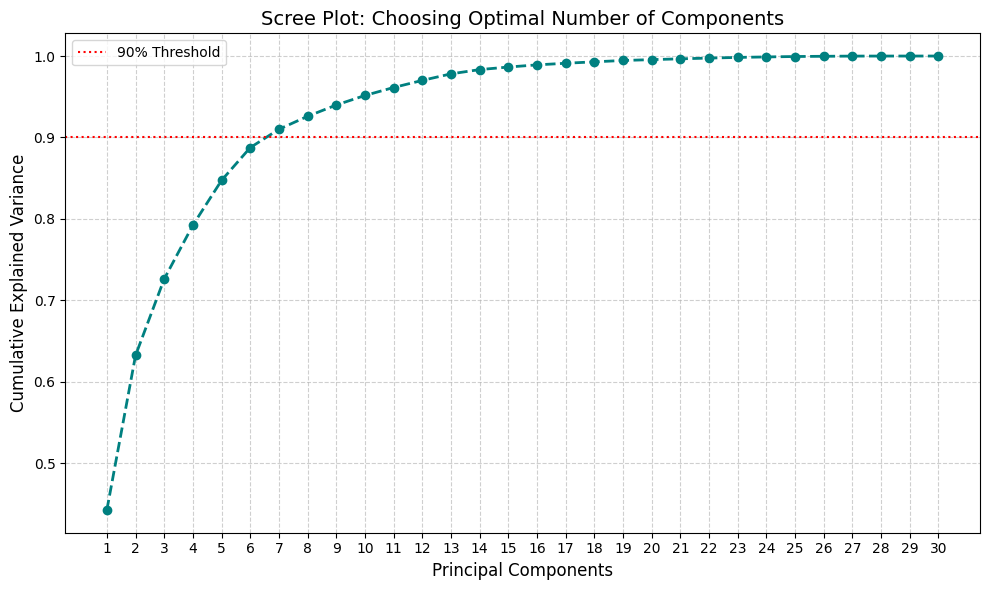

In [7]:
# Visualizing the cumulative explained variance to determine the optimal number of PCA components
def plot_cumulative_variance(cum_var_ratio):
    """
    Plots the cumulative explained variance to assist in identifying
    the optimal number of principal components for dimensionality reduction.

    Parameters:
    - cum_var_ratio (list or array-like): Cumulative explained variance ratios from PCA.
    """
    num_components = range(1, len(cum_var_ratio) + 1)

    plt.figure(figsize=(10, 6))
    plt.plot(num_components, cum_var_ratio, linestyle='--', marker='o', color='teal', linewidth=2)
    plt.xticks(num_components)
    plt.xlabel("Principal Components", fontsize=12)
    plt.ylabel("Cumulative Explained Variance", fontsize=12)
    plt.title("Scree Plot: Choosing Optimal Number of Components", fontsize=14)
    plt.axhline(y=0.9, color='r', linestyle=':', label='90% Threshold')  # Optional guideline
    plt.grid(visible=True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.tight_layout()
    plt.show()
plot_cumulative_variance(cumulative_variance_ratio)

**Interpretation of the PCA plot**

The scree plot above illustrates the cumulative explained variance of principal components derived from the Principal Component Analysis (PCA). From the graph, it can be observed that the first few components capture a significant portion of the dataset’s total variance.

Specifically, around the first **six** components account for approximately **90%** of the cumulative explained variance, as indicated by the red dotted threshold line.


This suggests that most of the essential information in the dataset can be retained by reducing the feature space to just these few components, thereby simplifying the model without substantial loss of data quality.

Beyond this point, the curve begins to flatten, meaning that additional components contribute very little to the overall variance. Therefore, selecting more than **six** components may unnecessarily increase the complexity of the analysis without offering meaningful improvements in explanatory power.


**Dimensionality Reduction to 2 components as instructed in the assignment**


In [8]:
#Reducing the data to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a new DataFrame for PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['target'] = y


In [11]:
def plot_pca_results(df, hue_column='target', title='PCA - 2D Projection'):
    """
    Plots the results of PCA transformation using the first two principal components.

    Parameters:
    - df: pandas DataFrame containing PCA results (must include 'PC1', 'PC2', and hue column)
    - hue_column: column to color points by (e.g., target class)
    - title: custom title for the plot
    """
    plt.figure(figsize=(10, 7))
    sns.scatterplot(
        data=df,
        x='PC1',
        y='PC2',
        hue=hue_column,
        palette='Spectral',
        s=80,
        edgecolor='k',
        alpha=0.6
    )

    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel('Principal Component 1', fontsize=12)
    plt.ylabel('Principal Component 2', fontsize=12)
    plt.axhline(0, linestyle='--', color='gray', linewidth=0.7)
    plt.axvline(0, linestyle='--', color='gray', linewidth=0.7)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend(title=hue_column, loc='best', frameon=True)
    plt.tight_layout()
    plt.show()

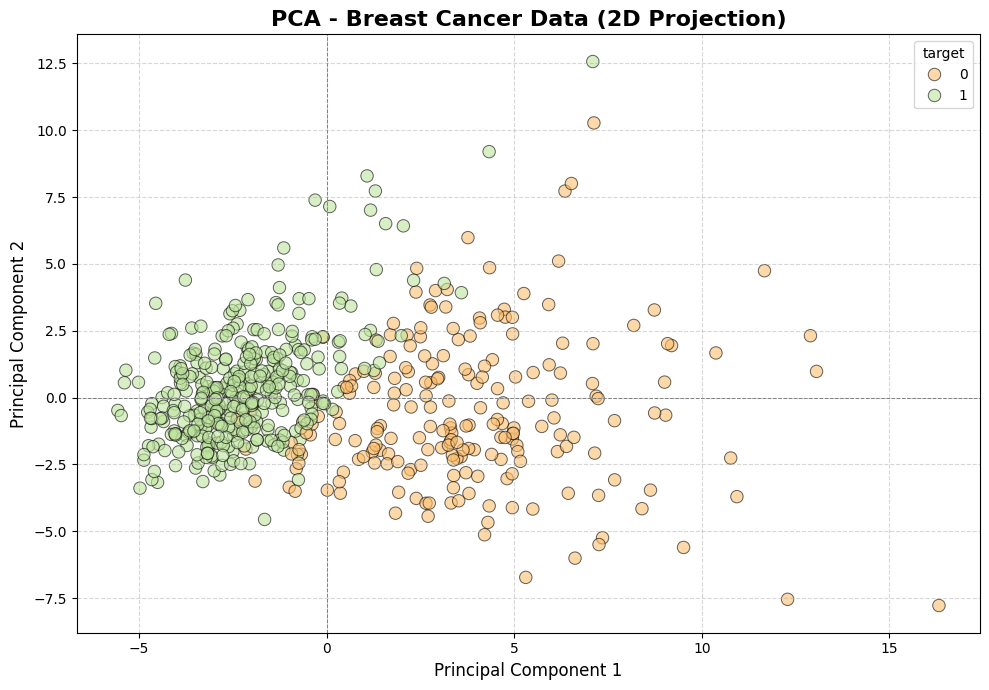

In [12]:
plot_pca_results(pca_df, hue_column='target', title='PCA - Breast Cancer Data (2D Projection)')



# **Building a Logistic Regression model with PCA Components**

In [13]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)



In [14]:
# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)



LogisticRegression()

In [15]:
# Predict
y_pred = model.predict(X_test)



In [16]:
# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9912280701754386
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



**Interpretation**

The model performed exceptionally well, correctly predicting the outcome for over 99% of the test samples. For the two classes, it showed strong balance: it correctly identified 98% of Class 0 cases and 100% of Class 1 cases.

In terms of precision, it was also nearly perfect,meaning that when the model made a prediction, it was almost always right. Overall, the scores for accuracy, precision, recall, and F1-score were all very high (at 99%), which means the model is both accurate and reliable in classifying the data.


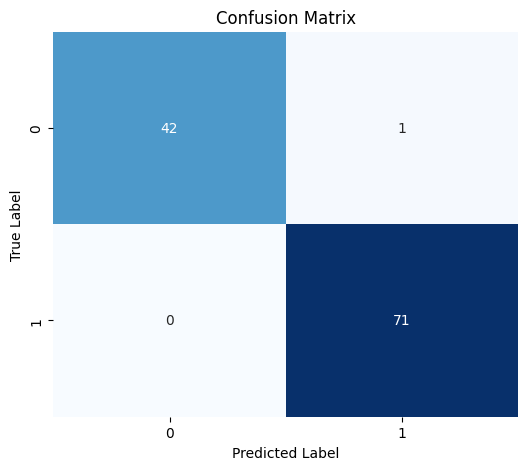

In [18]:
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#Interpretation

True Positives (Class 1 correctly predicted): 71 cases were correctly identified as Class 1.

True Negatives (Class 0 correctly predicted): 42 cases were correctly identified as Class 0.

False Positives: 1 case was incorrectly predicted as Class 1 when it was actually Class 0.

False Negatives: 0 cases were incorrectly predicted as Class 0 when they were actually Class 1.

This means the model made only one mistake in classifying Class 0 samples and did not miss any Class 1 samples. Overall, this reflects excellent classification performance with very few errors.